<a href="https://colab.research.google.com/github/augustofirmo/imersao_dados_alura/blob/main/Dia2_alura_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imersão dados Alura - Dia 2 - Augusto Firmo**
Desafio 01: Ordenar o gráfico countplot.

Desafio 02: Melhorar a visualização alterando tamanho da fonte...

Desafio 03: Plotar os histogramas com seaborn

Desafio 04: Estudar sobre as estatíticas retornadas no .describe()

Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

Desafio 06: Fazer outras análises com o boxplot e até com o histograma.

Desafio 07: Resumo do que você aprendeu com os dados

Para o segundo dia, iniciaremos os desafios propostos carregando os dados do experimento proposto para análise. Também mudaremos a coluna de nome droga para composto, dessa forma o artigo se torna mais bem visto por pessoas que dão sentido negativo para a palavra droga.

In [1]:
import pandas as pd

dados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4

# **Desafio 01:**

Para análise dos compostos utilizados no experimento, primeiramente pode-se analisar a quantidade existente dos mesmos.

In [2]:
len(dados['composto'].unique())

3289

Pelo alto número de diferentes compostos utilizados no experimento, torna-se praticamente impossível a análise de todos de uma única vez. Dessa forma, pode-se observar quais são os mais usados durante o experimento.

In [3]:
dados['composto'].value_counts().head(10)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: composto, dtype: int64

Pode-se observar que do nono composto para o décimo composto, existe uma diferença notável no número de vezes que foi utilizado no experimento, dessa forma, podemos analisar os nove primeiros compostos de uma maneira mais satisfatória.

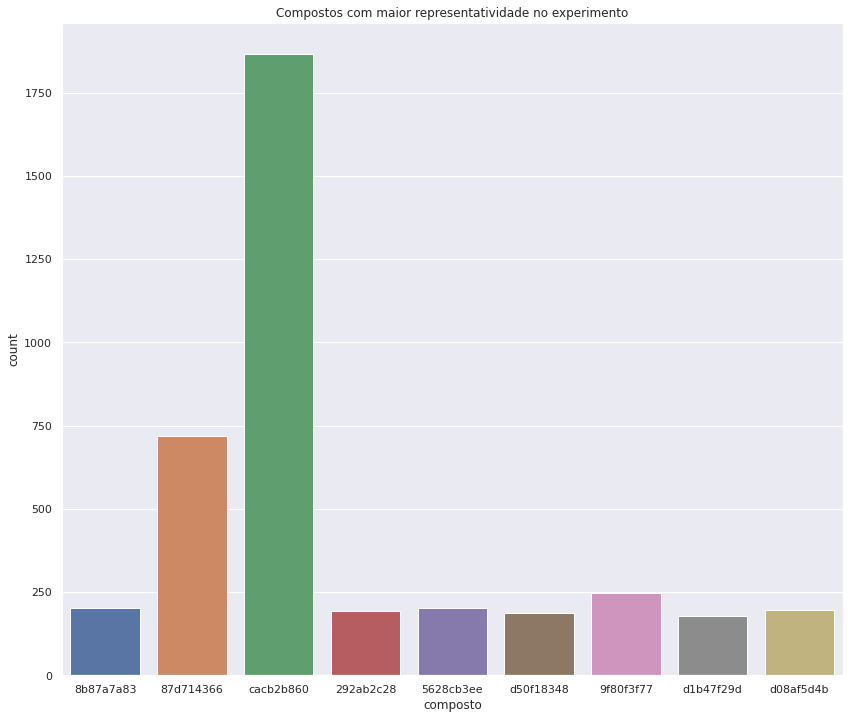

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


cod_compostos = dados['composto'].value_counts().index[0:9]


plt.figure(figsize=(14, 12))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Compostos com maior representatividade no experimento')
plt.show()

Para uma melhor visualização dos dados apresentados no gráfico, o objetivo do desafio é a ordenação destes dados do de maior para o de menor valor, ou seja, ordem decrescente. Lendo a documentação do seaborn.countplot (https://seaborn.pydata.org/generated/seaborn.countplot.html), existe um parâmetro para a ordem dos dados. Como "cod_compostos" foi criado a partir de um "value_counts", já possui a ordem desejada. Dessa forma:

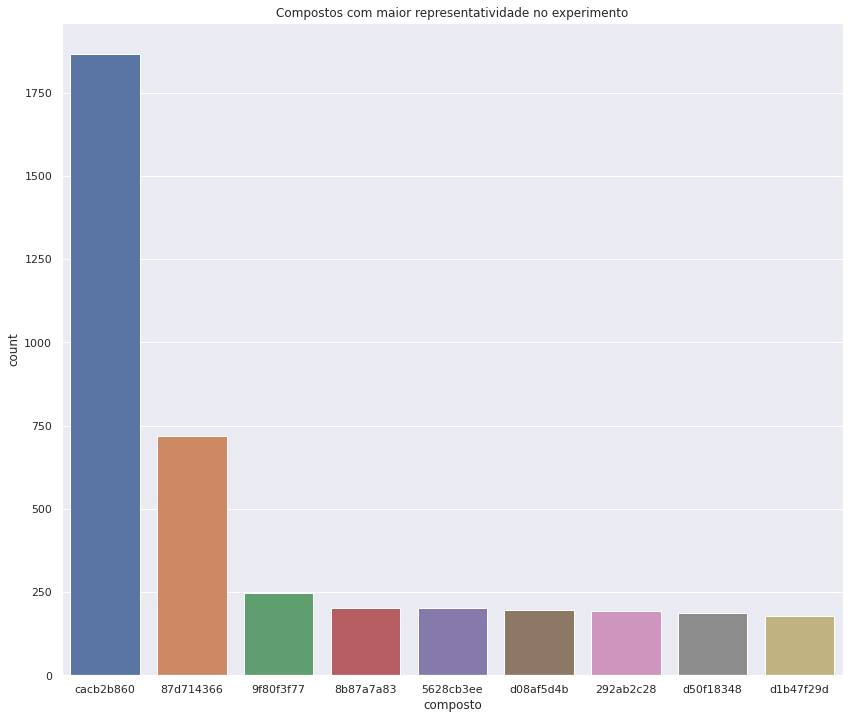

In [5]:
plt.figure(figsize=(14, 12))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Compostos com maior representatividade no experimento')
plt.show()

# **Desafio 2:**

É pedido que além de tornar os dados mais visíveis, alterando sua ordem para decrescente, que melhore o gráfico aumentando o tamanho da fonte do título, das legendas dos eixos, etc. Dessa forma:


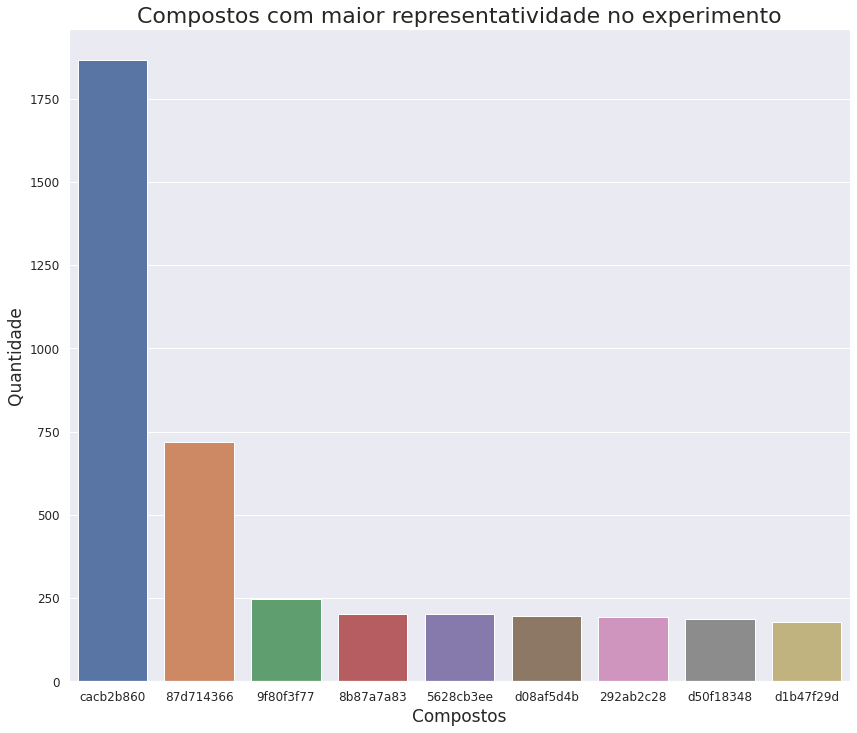

In [6]:
plt.figure(figsize=(14, 12))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order = cod_compostos)
ax.set_title('Compostos com maior representatividade no experimento',fontsize=22)
ax.set_xlabel("Compostos",fontsize=17)
ax.set_ylabel("Quantidade",fontsize=17)
ax.tick_params(labelsize=12)
plt.show()

# **Desafio 03, 04 e 06**

Passaremos agora a analisar os dados restantes do conjunto, compostos por dois tipos principais, as expressões gênicas e viabilidade celular.

Podemos entender por expressão gênica em uma forma geral, um comando realizado pelo DNA para que se produza ou execute uma ação.

Fonte: https://pt.khanacademy.org/science/biology/gene-expression-central-dogma/central-dogma-transcription/a/intro-to-gene-expression-central-dogma/

Para viabilidade celular, podemos entender como um teste que analisa células metabolicamente ativas em uma cultura celular. Usados muitas vezes para triar moléculas que possuem efeitos na proliferação celular, ou efeitos tóxicos que eventualmente podem conduzi-las a morte.

Fonte: https://pt.wikipedia.org/wiki/Ensaios_de_viabilidade_celular#:~:text=Um%20ensaio%20de%20viabilidade%20celular,sua%20atividade%20qualitativa%20e%20quantitativamente.


Primeiramente, começaremos pela análise dos dados de expressões gênicas, através de um histograma da expressão identificada como "g-0".


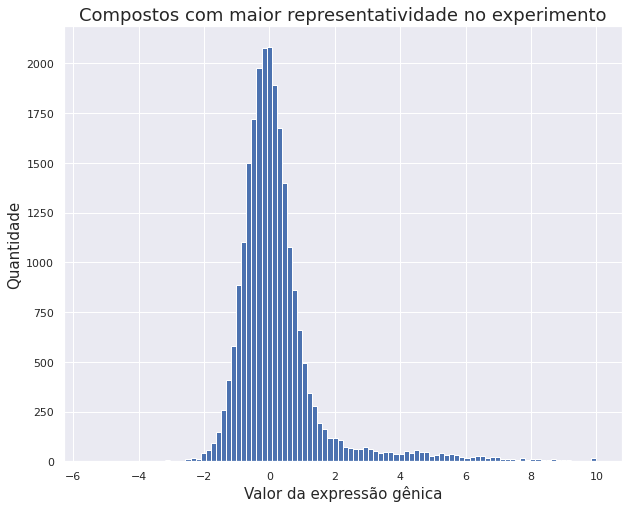

In [7]:
plt.figure(figsize=(10, 8))
ax = dados['g-0'].hist(bins = 100)
ax.set_title('Compostos com maior representatividade no experimento',fontsize=18)
ax.set_xlabel("Valor da expressão gênica",fontsize=15)
ax.set_ylabel("Quantidade",fontsize=15)
ax.tick_params(labelsize=11)
plt.show()

Levando em consideração o que significa o termo expressão gênica, talvez possamos classicar valores próximos de zero como pouca "atividade gênica", e assim classificar que o medicamento em questão não reagiu com o DNA da célula testada, e os valores mais distantes do zero, representam uma maior "atividade gênica", onde o medicamento reagiu com a célula testada em maiores níveis.

Para uma análise geral dos dados de expressão gênica, podemos agrupar todos e realizar algumas análises básicas de estatística. Dessa forma:

In [8]:
dados_g = dados.loc[:,'g-0':'g-771'].describe().T
dados_g

,count,mean,std,min,25%,50%,75%,max
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g-767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g-768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g-769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g-770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


O método describe(), retorna algumas estátisticas básicas sobre os dados analisados, tais como:

**Média**: é a média geral dos dados, soma-se todos os valores das amostras a serem analisados e este resultado é dividido pelo total de amostras. Podendo ser descrita como se segue para um conjunto de $n$ amostras com valores $x_1, x_2, ... , x_n$.

$\bar{x} = \frac{1}{n} (\sum_{i - 1}^{n} {x_i}) = \frac{x_1 + x_2 + ... + x_n}{n} $

**Desvio padrão**: é uma medida de dispersão, ou seja, é uma medida que indica o quanto o conjunto de dados é uniforme. De forma mais simples, quando seu valor é baixo, podemos interpretar como os dados da amostra estão mais próximos da média. Quando seu valor é alto, pode-se interpretar como os dados da amostra estão mais distantes da média. De forma geral é uma maneira de se interpretar o quão homogênea é a amostra. Pode ser expressa como:

$\sigma = \sqrt{\frac{\sum_{i - 1}^{n}(x_i - \bar{x})^2}{n}}$ 

**Valor mínimo**: é o menor valor de todos os dados observados.

**Valor máximo**: é o maior valor de todos os dados observados.

**25, 50 e 75 Percentil**: O percentil representa quantos porcentos da amostra estão abaixo daquele valor. Então para 25 percentil, podemos interpretar como 25% dos dados estão abaixo daquele valor e 75% estão acima. Para 50 percentil, pode-se interpretar como 50% dos dados estão abaixo daquele valor e 50% acima, sendo assim a mediana. E 75 percentil pode ser interpretado como 75% dos dados estão abaixo daquele valor e 25% estão acima.



Podemos então plotar gráficos em histogramas para todas estas análises.

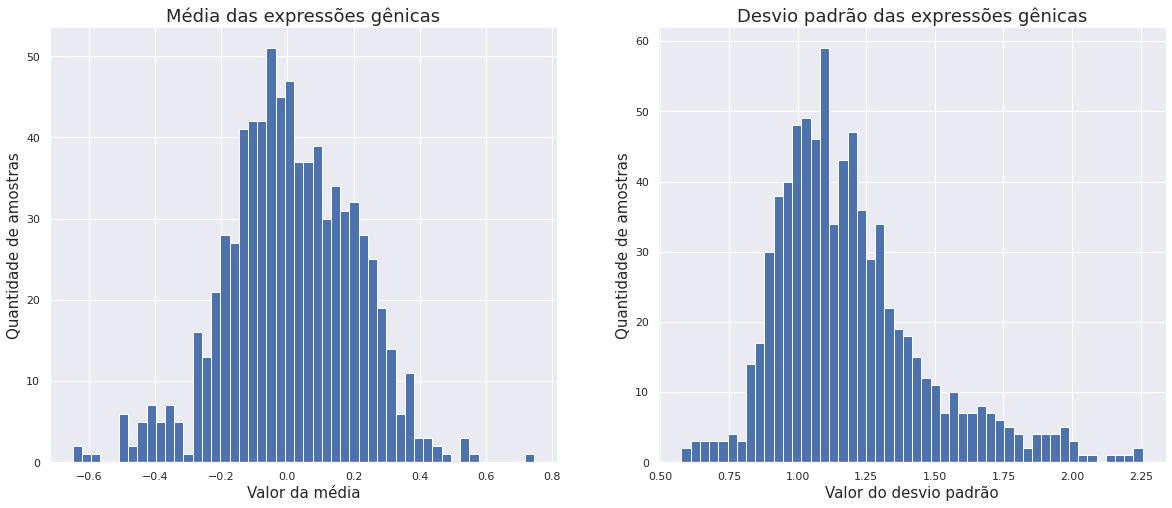

In [9]:
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.hist(dados_g['mean'], bins=50)
ax2.hist(dados_g['std'], bins=50)
ax.set_title('Média das expressões gênicas',fontsize=18)
ax.set_xlabel('Valor da média',fontsize=15)
ax.set_ylabel('Quantidade de amostras',fontsize=15)
ax.tick_params(labelsize=11)

ax2.set_title('Desvio padrão das expressões gênicas',fontsize=18)
ax2.set_xlabel('Valor do desvio padrão',fontsize=15)
ax2.set_ylabel('Quantidade de amostras',fontsize=15)
ax2.tick_params(labelsize=11)
plt.show()

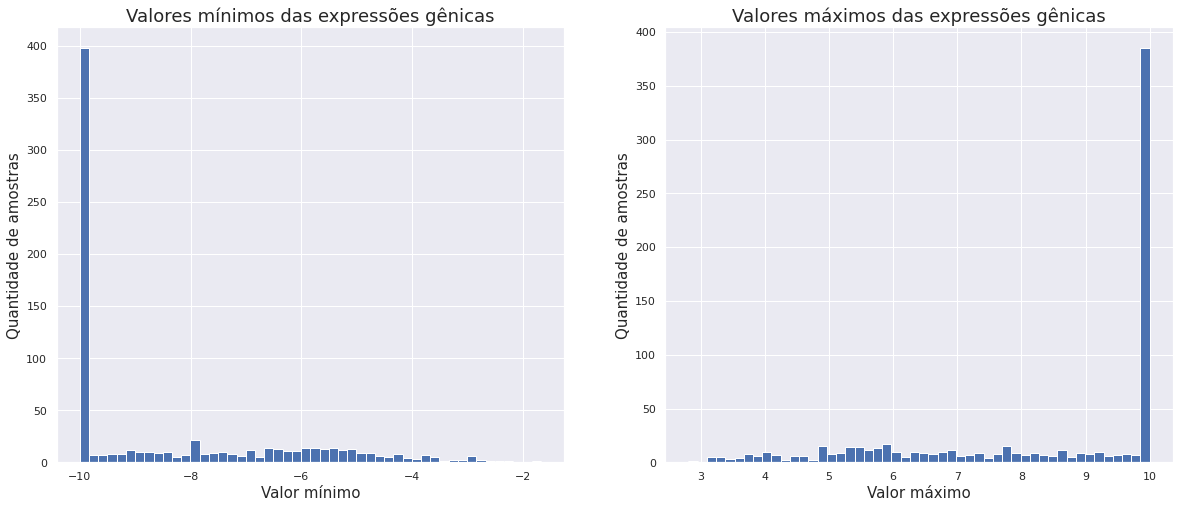

In [10]:
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.hist(dados_g['min'], bins=50)
ax2.hist(dados_g['max'], bins=50)
ax.set_title('Valores mínimos das expressões gênicas',fontsize=18)
ax.set_xlabel('Valor mínimo',fontsize=15)
ax.set_ylabel('Quantidade de amostras',fontsize=15)
ax.tick_params(labelsize=11)

ax2.set_title('Valores máximos das expressões gênicas',fontsize=18)
ax2.set_xlabel('Valor máximo',fontsize=15)
ax2.set_ylabel('Quantidade de amostras',fontsize=15)
ax2.tick_params(labelsize=11)
plt.show()

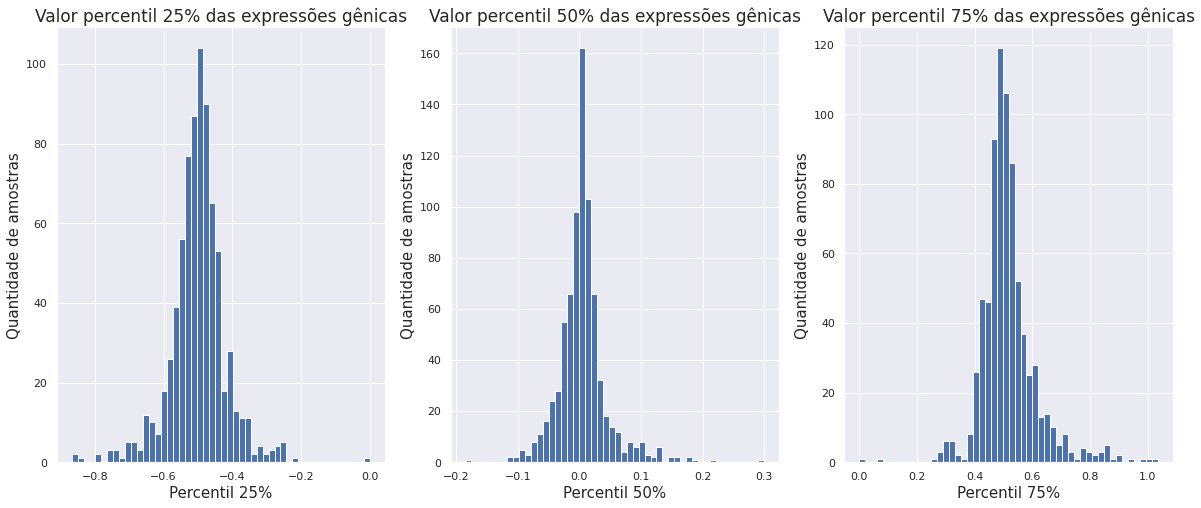

In [11]:
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.hist(dados_g['25%'], bins=50)
ax2.hist(dados_g['50%'], bins=50)
ax3.hist(dados_g['75%'], bins=50)

ax.set_title('Valor percentil 25% das expressões gênicas',fontsize=17)
ax.set_xlabel('Percentil 25%',fontsize=15)
ax.set_ylabel('Quantidade de amostras',fontsize=15)
ax.tick_params(labelsize=11)

ax2.set_title('Valor percentil 50% das expressões gênicas',fontsize=17)
ax2.set_xlabel('Percentil 50%',fontsize=15)
ax2.set_ylabel('Quantidade de amostras',fontsize=15)
ax2.tick_params(labelsize=11)

ax3.set_title('Valor percentil 75% das expressões gênicas',fontsize=17)
ax3.set_xlabel('Percentil 75%',fontsize=15)
ax3.set_ylabel('Quantidade de amostras',fontsize=15)
ax3.tick_params(labelsize=11)

plt.show()

Primeiramente, vou revisar o entendimento que temos até o momento do que seria o dado expressão gênica, representando a atividade gênica das culturas testadas, valores próximos de zero podem representar baixa atividade gênica e dessa forma podemos fazer as seguintes análises:

Média: Pode-se observar que o histograma das médias seguem basicamente uma curva gaussiana centrada em zero, indicando que a maioria dos medicamentos não surtiram ou surtiram uma baixa atividade gênica nas culturas testadas.

Desvio padrão: Os valores de maior destaque no desvio padrão estão entre 1 e 1,25, sabendo-se que o valor máximo das expressões gênicas é de 10, podemos declarar que a maioria dos sinais estão concentrados em torno da média.

Valores mínimos e máximos: Considerando que valores próximos de zero para a expressão gênica representa pouca ou nenhuma atividade gênica, os valores máximos de 10 e mínimos de -10 podem representar experimentos onde a cultura teve muita reação gênica com o medicamento.






In [12]:
dados_c = dados.loc[:,'c-0':'c-99'].describe().T
dados_c

,count,mean,std,min,25%,50%,75%,max
c-0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c-1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c-2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c-3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c-4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


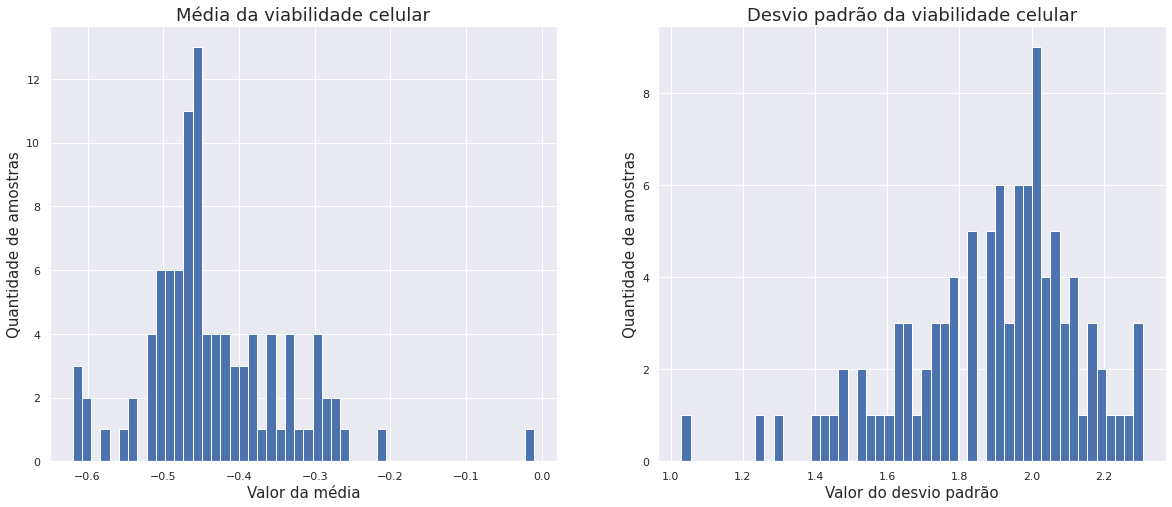

In [13]:
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.hist(dados_c['mean'], bins=50)
ax2.hist(dados_c['std'], bins=50)
ax.set_title('Média da viabilidade celular',fontsize=18)
ax.set_xlabel('Valor da média',fontsize=15)
ax.set_ylabel('Quantidade de amostras',fontsize=15)
ax.tick_params(labelsize=11)

ax2.set_title('Desvio padrão da viabilidade celular',fontsize=18)
ax2.set_xlabel('Valor do desvio padrão',fontsize=15)
ax2.set_ylabel('Quantidade de amostras',fontsize=15)
ax2.tick_params(labelsize=11)
plt.show()

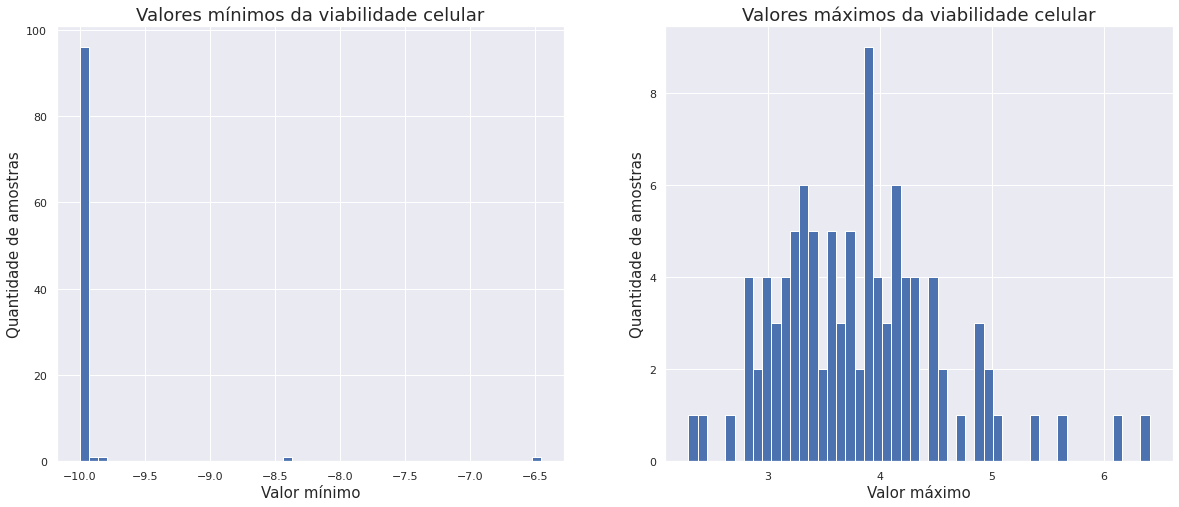

In [14]:
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.hist(dados_c['min'], bins=50)
ax2.hist(dados_c['max'], bins=50)
ax.set_title('Valores mínimos da viabilidade celular',fontsize=18)
ax.set_xlabel('Valor mínimo',fontsize=15)
ax.set_ylabel('Quantidade de amostras',fontsize=15)
ax.tick_params(labelsize=11)

ax2.set_title('Valores máximos da viabilidade celular',fontsize=18)
ax2.set_xlabel('Valor máximo',fontsize=15)
ax2.set_ylabel('Quantidade de amostras',fontsize=15)
ax2.tick_params(labelsize=11)
plt.show()

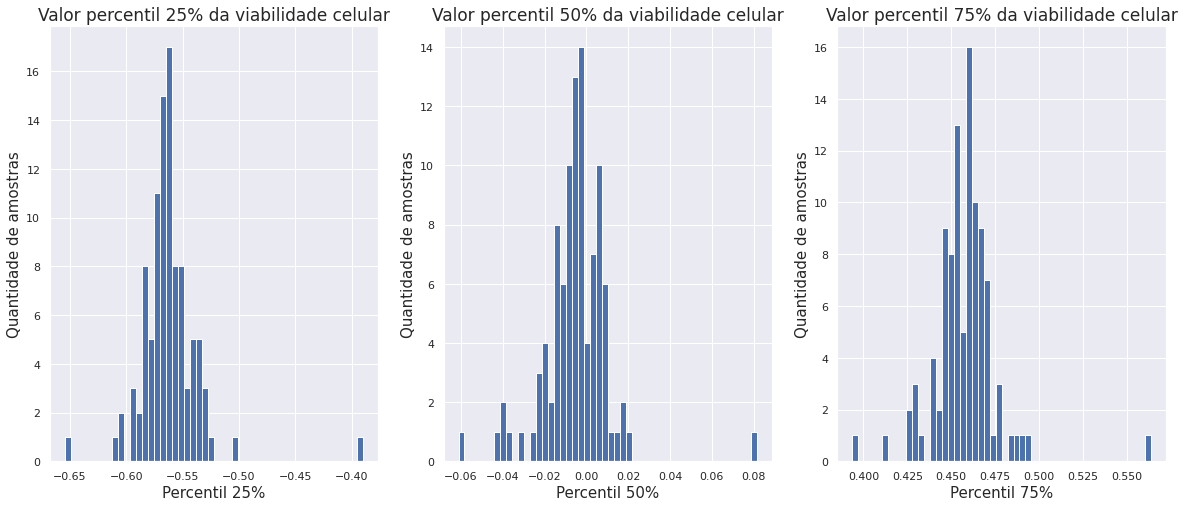

In [15]:
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.hist(dados_c['25%'], bins=50)
ax2.hist(dados_c['50%'], bins=50)
ax3.hist(dados_c['75%'], bins=50)

ax.set_title('Valor percentil 25% da viabilidade celular',fontsize=17)
ax.set_xlabel('Percentil 25%',fontsize=15)
ax.set_ylabel('Quantidade de amostras',fontsize=15)
ax.tick_params(labelsize=11)

ax2.set_title('Valor percentil 50% da viabilidade celular',fontsize=17)
ax2.set_xlabel('Percentil 50%',fontsize=15)
ax2.set_ylabel('Quantidade de amostras',fontsize=15)
ax2.tick_params(labelsize=11)

ax3.set_title('Valor percentil 75% da viabilidade celular',fontsize=17)
ax3.set_xlabel('Percentil 75%',fontsize=15)
ax3.set_ylabel('Quantidade de amostras',fontsize=15)
ax3.tick_params(labelsize=11)

plt.show()

Basicamente as mesmas análises podem ser feitas para a viabilidade celular, restando a dúvida se valores próximos a zero indicam uma boa viabilidade celular, resultando na vida da cultura após a aplicação dos medicamentos, ou uma baixa viabilidade celular, indicando a morte da cultura.

# **Desafio 07:**

O aprendizado dessa aula fica muito voltada ao uso de histogramas e principalmente de alguns artifícios estatísticos como média, desvio padrão e etc.

Em vista do conjunto de dados, o principal entendimento se deu no que é atividade gênica e viabilidade celular, sendo esses basicamente os resultados colhidos de todas as experimentações.